# **Importing Libraries/Files**

In [1]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
# Steps to download zip from kaggle and unzip
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arjunprasadsarkhel/2021-olympics-in-tokyo
!unzip 2021-olympics-in-tokyo.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo
License(s): CC-BY-SA-4.0
100% 348k/348k [00:00<00:00, 969kB/s]
100% 348k/348k [00:00<00:00, 967kB/s]
Archive:  2021-olympics-in-tokyo.zip
  inflating: Athletes.xlsx           
  inflating: Coaches.xlsx            
  inflating: EntriesGender.xlsx      
  inflating: Medals.xlsx             
  inflating: Teams.xlsx              


In [3]:
#Installing pyspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5ac4c606f4da2fdc480bbba9cfbdff09d9ca93c7638200baac729d2709c089a9
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [4]:
#Importing the pyspark library
import pyspark
spark = pyspark.sql.SparkSession(pyspark.SparkContext())
spark

# **Converting excel files to csv files format**

In [5]:
#Importing pandas library
import pandas as pd

#Converting the excel files into csv files for data visualisation
def excel_to_csv(name):
  pd.read_excel(name + '.xlsx').to_csv(name + '.csv', sep=',', index=False)

excel_to_csv('Athletes')
excel_to_csv('Coaches')
excel_to_csv('EntriesGender')
excel_to_csv('Medals')
excel_to_csv('Teams')


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
# Read in Pandas dataframes
athletes = pd.read_csv('Athletes.csv')
coaches = pd.read_csv('Coaches.csv')
entries_gender = pd.read_csv('EntriesGender.csv')
medals = pd.read_csv('Medals.csv')
teams = pd.read_csv('Teams.csv')

In [7]:
#Displaying the first 5 rows of the csv file
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [8]:
#Displaying the first 5 rows of the csv file
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [9]:
#Displaying the first 5 rows of the csv file
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [10]:
#Displaying the first 5 rows of the csv file
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [11]:
#Displaying the first 5 rows of the csv file
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


# **Data Visualisation**

In [12]:
#Sorting the medals data frame by Rank by Total
medals.sort_values('Rank by Total', inplace=True)
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5


### Number of Medals per Country

In [13]:
#Importing the plotly library
import plotly.express as px
#Creating the bar chart for number of medals per country
fig = px.bar(medals, x='Team/NOC', y=['Gold', 'Silver', 'Bronze'], color_discrete_sequence=['Gold', 'Silver', 'Brown'],title='Number of Medals per Country')
fig.show()

Overall, the graph shows the medal count of various countries, categorized into gold, silver, bronze medals.

Some of the key observation:

*   Countries like the United States, Great Britain, and China havea signficantly higher medal counts compareed to other countries, suggesting that a dominance in the represented sporting event.
*   There's a considerable gap between the top-ranking countries and the majority of countries, indicating a high level of competition concentration.
*   Despite there being variations in silver and broze medal counts, the number of gold medals seems to be the most significant factor in determining a country's overall ranking.
*   Some countries shown in this graph show lower overall medal counts might have surprsingly high numbers of gold medals, indicating strong performance in specific disciplines.





### Number of Coaches per Country



In [14]:
coaches.head(5)

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [15]:
# Add coaches to pyspark sql and make most basic query
spark.read.csv('Coaches.csv', header=True, inferSchema=True).createOrReplaceTempView('coaches')
spark.sql('select * from coaches').show(5)

+---------------+-------------+----------+-----+
|           Name|          NOC|Discipline|Event|
+---------------+-------------+----------+-----+
|ABDELMAGID Wael|        Egypt|  Football| NULL|
|      ABE Junya|        Japan|Volleyball| NULL|
|  ABE Katsuhiko|        Japan|Basketball| NULL|
|   ADAMA Cherif|Côte d'Ivoire|  Football| NULL|
|     AGEBA Yuya|        Japan|Volleyball| NULL|
+---------------+-------------+----------+-----+
only showing top 5 rows



In [16]:
# Obtaining the count of coaches from each NOC (country)
pd_coaches_query = spark.sql('Select NOC, Count(NOC) as Count from Coaches group by NOC order by NOC').toPandas()
pd_coaches_query.head(7)

,NOC,Count
0,Angola,1
1,Argentina,11
2,Australia,22
3,Austria,3
4,Bahrain,1
5,Belarus,1
6,Belgium,5


In [17]:
#Bar chart of coaches from each country
fig = px.bar(pd_coaches_query, x='NOC', y='Count', color = 'Count',title='Number of Coaches per Country')
fig.show()

The graph above presents the number of coaches associated with different National Olympic Committies (NOCs). It appears that the data is likely from a specific sporting event or competition.

Key Observations:
*   There's a significant variation in the number of coaches across countries. Some NOCs have a higher number of coaches compared to others. Which could suggest why countries like USA, Great Britain have a high performance in terms of achiving medals.
*   Some countries seem to be groupted together with similar coach counts, suggesting potential regional trends or similar levels of investment in coaching resources.
*   Countries like Japan, Germany, and China also seem to have a substantial number of coaches.





### Number of Athletes per Discipline

In [18]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [19]:
 # Add athletes to pyspark sql
spark.read.csv('Athletes.csv', header=True, inferSchema=True).createOrReplaceTempView('Athletes')
spark.sql('select * from athletes order by NOC, Discipline').show(20)

+--------------------+-----------+-------------------+
|                Name|        NOC|         Discipline|
+--------------------+-----------+-------------------+
|       YOUSOFI Kimia|Afghanistan|          Athletics|
|NOOR ZAHI Sha Mah...|Afghanistan|          Athletics|
|        YOVARI Mahdi|Afghanistan|           Shooting|
|        ANWARI Fahim|Afghanistan|           Swimming|
|     MANSOURI Farzad|Afghanistan|          Taekwondo|
|       PETROV Matvei|    Albania|Artistic Gymnastics|
|       SMAJLAJ Izmir|    Albania|          Athletics|
|      CULLHAJ Indrit|    Albania|               Judo|
|     DELILAJ Manuela|    Albania|           Shooting|
|         KADIU Kledi|    Albania|           Swimming|
|       MERIZAJ Nikol|    Albania|           Swimming|
|        CALJA Briken|    Albania|      Weightlifting|
|      QERIMAJ Erkand|    Albania|      Weightlifting|
|      HETHAT Yassine|    Algeria|          Athletics|
| LAHOULOU Abdelmalik|    Algeria|          Athletics|
|TRIKI Yas

In [20]:
# Get count of each unique combination of NOC and Discipline
pd_athletes_query = spark.sql('''select first(NOC) as NOC, first(Discipline) as Discipline,
                                 count(*) Count from athletes group by NOC, Discipline order
                                 by NOC, Discipline''').toPandas()
pd_athletes_query.head(10)

,NOC,Discipline,Count
0,Afghanistan,Athletics,2
1,Afghanistan,Shooting,1
2,Afghanistan,Swimming,1
3,Afghanistan,Taekwondo,1
4,Albania,Artistic Gymnastics,1
5,Albania,Athletics,1
6,Albania,Judo,1
7,Albania,Shooting,1
8,Albania,Swimming,2
9,Albania,Weightlifting,2


In [21]:
#Bar chart for number of athletes per discipline
fig = px.bar(pd_athletes_query, x='NOC', y='Count', color = 'Discipline',title='Number of Athletes per Discipline')
fig.show()

The graph represents the number of athletes participating in different disciplines across various countries.

Key Observations:
*   After analysing this graph, it is clear that the number of athletes varies significantly across both disciplines and countries. Some disciplines have a considerably higher number of athletes compared to others, and the same applies to countries.
*   Disciplines like Cycling track and Karate seem to have a larger number of athletes overall compared to other disciplines  like sport climbing and Trampoline Gymnastics.
*   Despite other countries have a presence in multiple disciplines, other countries might be focused on specific ones.
*   There're few countries with a higher number athletes across different countries.





### Number of athletes from each country per discipline

In [22]:
#Displaying the number of athletes per discipline
athletes['Discipline'].value_counts().head(10)

Discipline
Athletics       2068
Swimming         743
Football         567
Rowing           496
Hockey           406
Judo             373
Handball         343
Shooting         342
Sailing          336
Rugby Sevens     283
Name: count, dtype: int64

In [23]:
# Only keep rows with discipline in top 3
pd_athletes_query = pd_athletes_query.loc[pd_athletes_query['Discipline'].isin(['Athletics', 'Swimming', 'Football'])]
pd_athletes_query.head(5)

,NOC,Discipline,Count
0,Afghanistan,Athletics,2
2,Afghanistan,Swimming,1
5,Albania,Athletics,1
8,Albania,Swimming,2
10,Algeria,Athletics,8


In [24]:
#Bar chart for Number of athletes from each country per discipline
fig = px.bar(pd_athletes_query, x='NOC', y='Count', color='Discipline', title='Number of athletes from each country per discipline')
fig.show()

The graph represents the number of athletes participating in different disciplines across various countries. It is a visualization of data from a specific event of competition.

Key Observations:
*   The number of athletes varies significantly across both disciplines and countries. In other words, some disciplines have considerably higher number of athletes compared to others, and the same applies to countries.
*   Disciplines like Athletics and Swimming seem to have a larger number of athletes overall compared other disciplines like Football.





### Distribution of Gender amongst each game

In [25]:
entries_gender.head(5)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [26]:
# Make a Pie chart for each discipline showing the percentage of males vs females in each discipline
from plotly.subplots import make_subplots
import plotly.graph_objects as go

specs = [[{'type':'domain'}, {'type':'domain'}]]*23
fig = make_subplots(rows=23, cols=2,
                    subplot_titles=entries_gender['Discipline'], specs=specs)
sub_figs = []
for index, row in entries_gender.iterrows():
  sub_fig = go.Pie(labels=['Female', 'Male'], values=[row['Female'],
                                                      row['Male']])
  sub_figs.append(sub_fig)

k=0
for i in range(1, 24):
  for j in range(1, 3):
    fig.add_trace(sub_figs[k], i, j)
    k+=1

fig.update_layout(showlegend=False, height=10000, width=800, title_text="Distribution of Gender amongst each game")
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent')

fig = go.Figure(fig)
fig.show()

### Number of Teams by Country

In [27]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


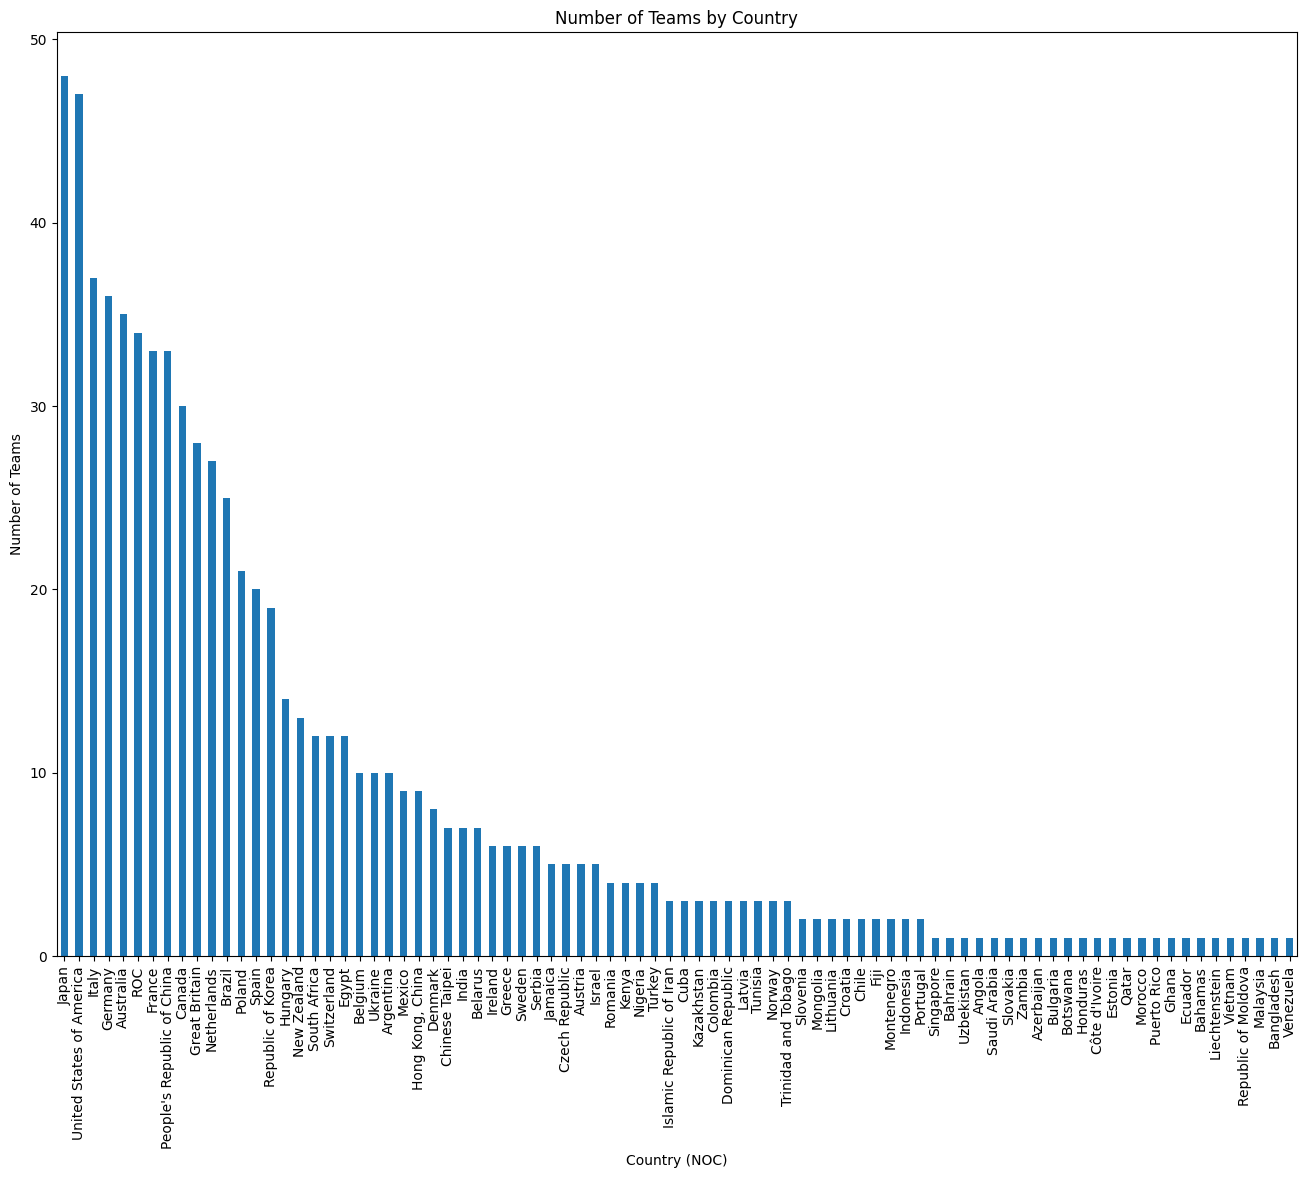

In [28]:
#Importing matplotlib
import matplotlib.pyplot as plt
country_counts = teams['NOC'].value_counts()
#Bar chart for number of teams by country
plt.figure(figsize=(16, 12))
country_counts.plot(kind='bar')
plt.title('Number of Teams by Country')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Teams')
plt.show()

From this bar chart Japan has the highest number of teams

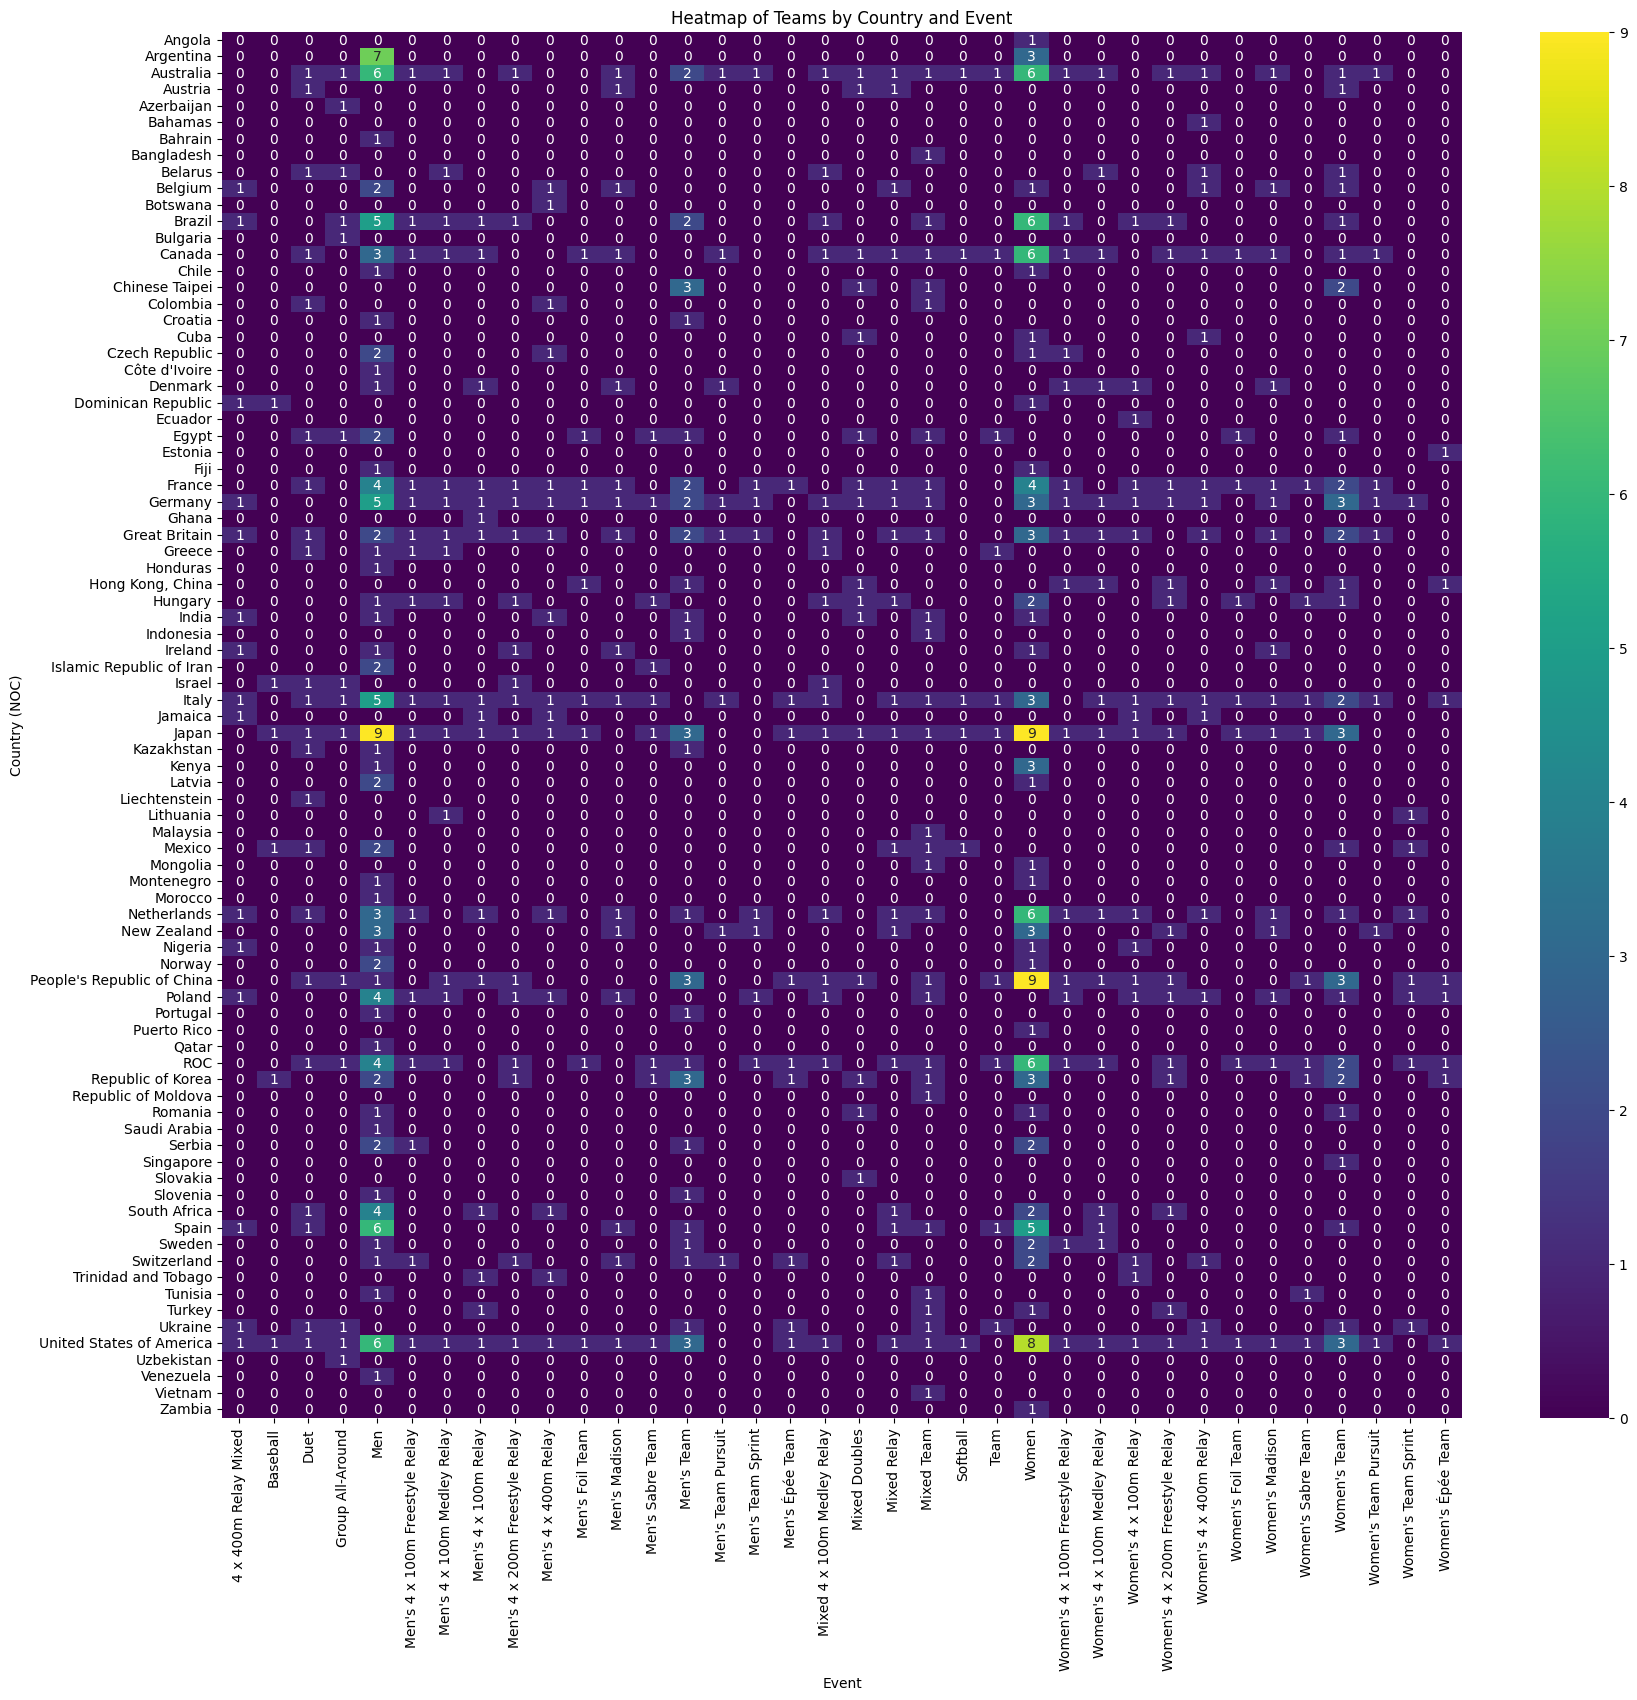

In [29]:
#Importing the seaborn library
import seaborn as sns
#Heatmap for teams by country and event
event_country_counts = teams.groupby(['NOC', 'Event']).size().unstack().fillna(0)

plt.figure(figsize=(20, 18))
sns.heatmap(event_country_counts, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Teams by Country and Event')
plt.xlabel('Event')
plt.ylabel('Country (NOC)')
plt.show()


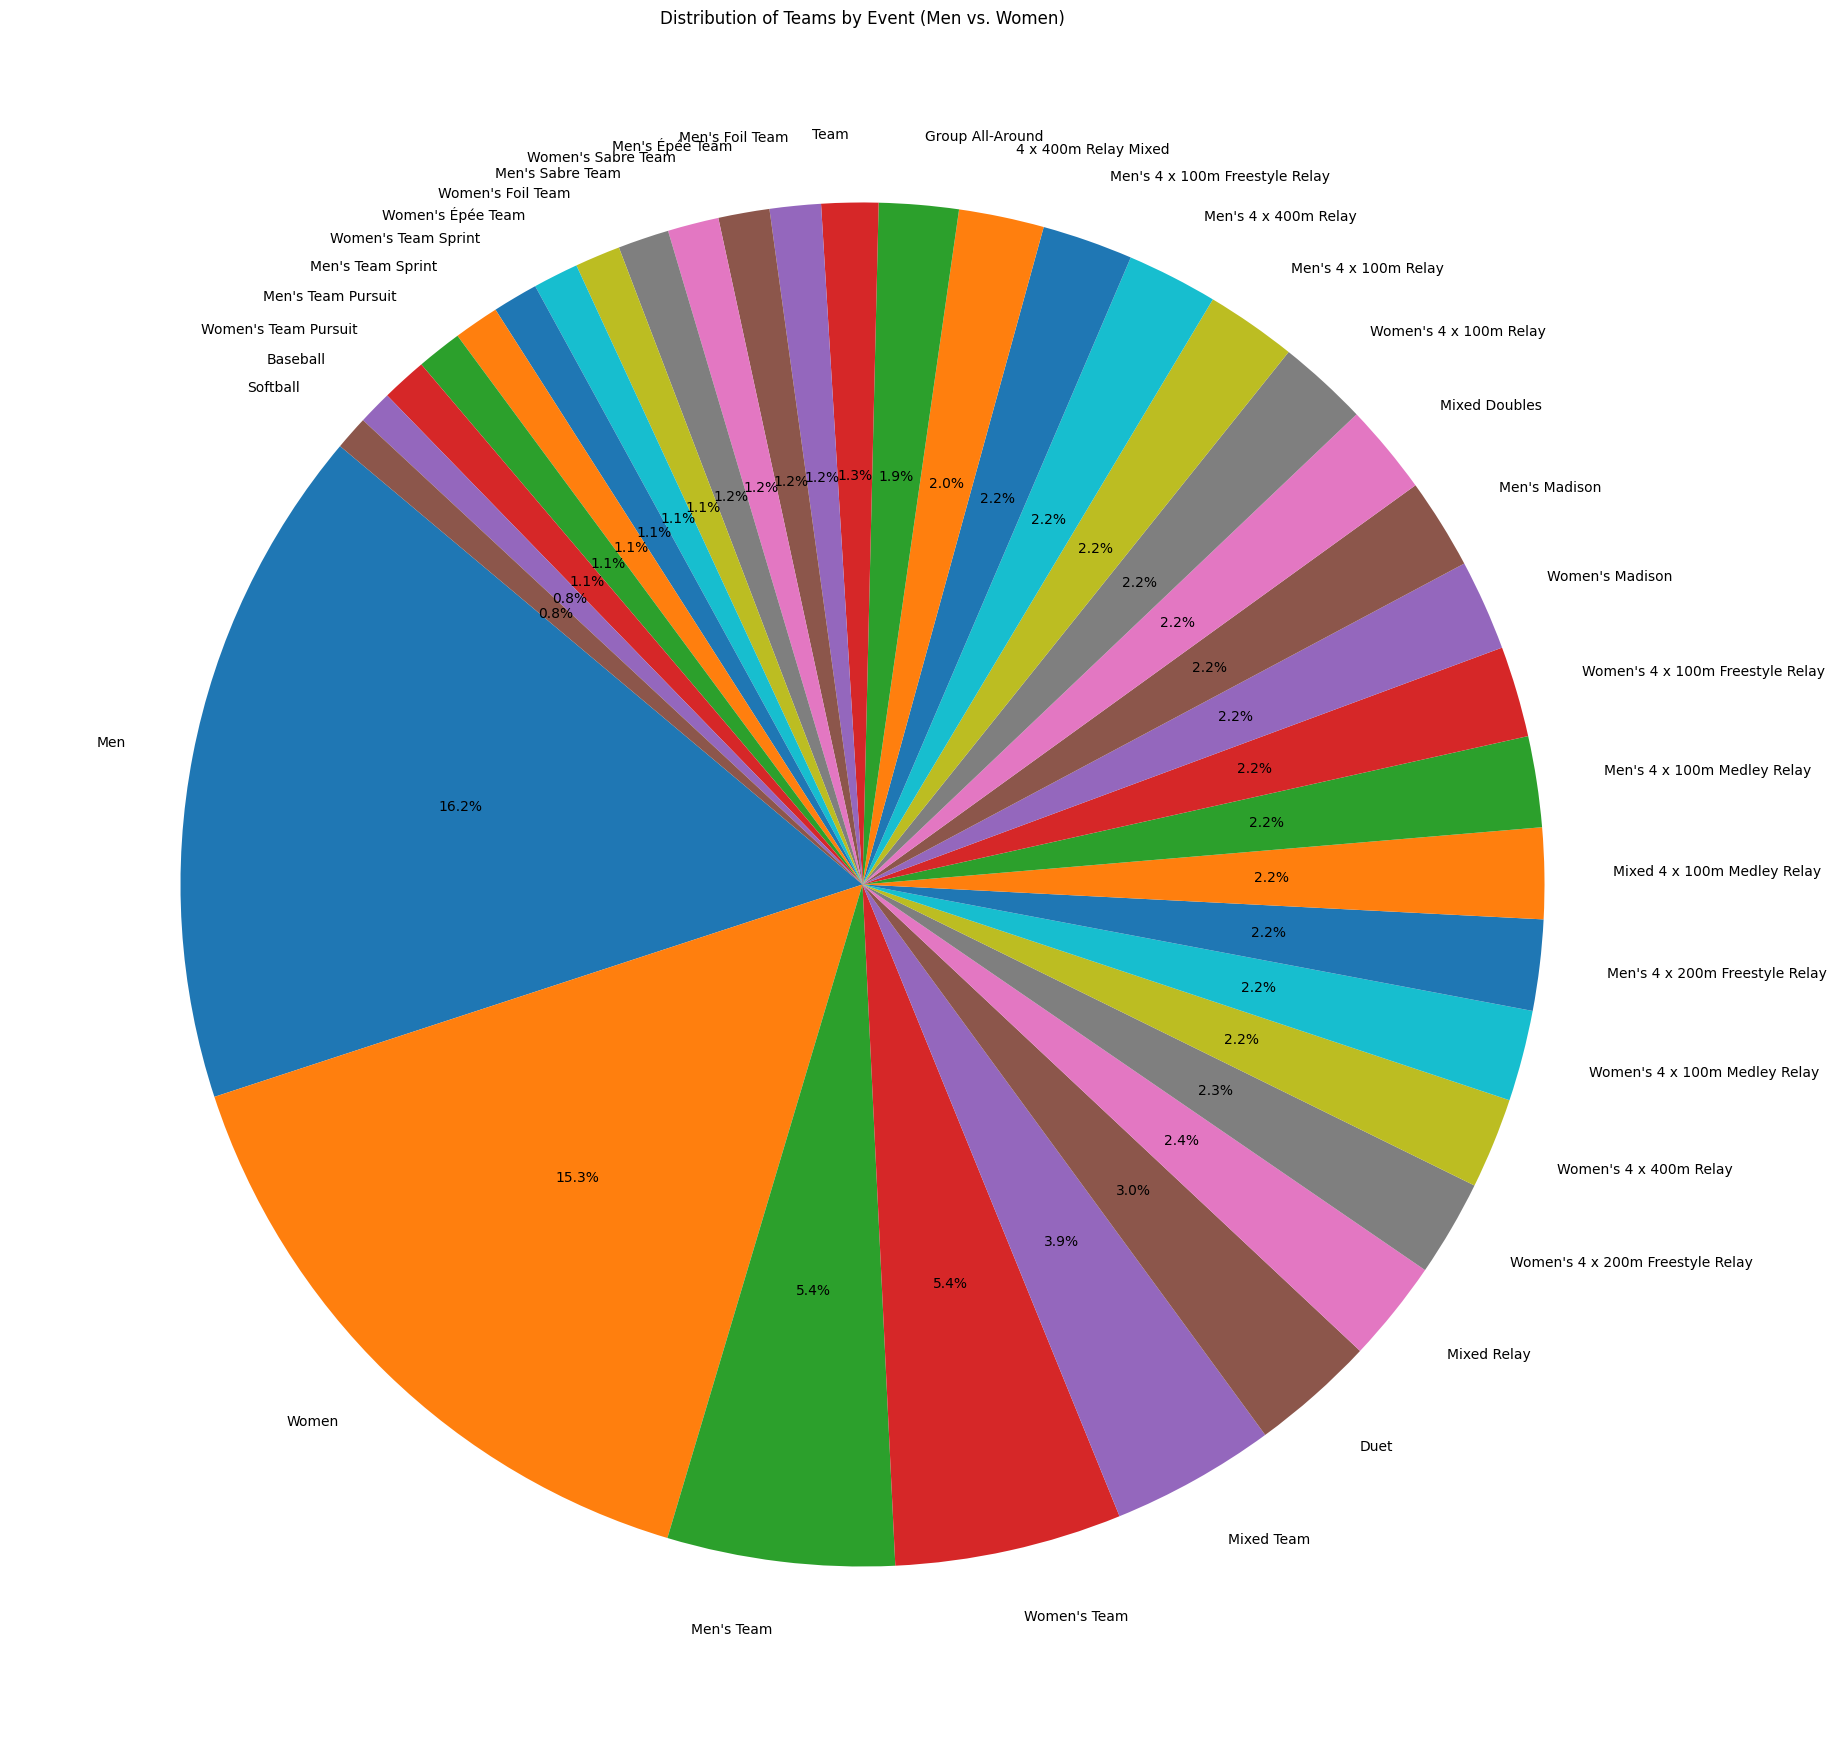

In [30]:
event_counts = teams['Event'].value_counts()

plt.figure(figsize=(22, 30))
event_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Teams by Event (Men vs. Women)')
plt.ylabel('')
plt.show()


In [31]:
gender_number = teams['Event'].value_counts()
print(gender_number)

Event
Men                                 120
Women                               114
Men's Team                           40
Women's Team                         40
Mixed Team                           29
Duet                                 22
Mixed Relay                          18
Women's 4 x 200m Freestyle Relay     17
Women's 4 x 400m Relay               16
Women's 4 x 100m Medley Relay        16
Men's 4 x 200m Freestyle Relay       16
Mixed 4 x 100m Medley Relay          16
Men's 4 x 100m Medley Relay          16
Women's 4 x 100m Freestyle Relay     16
Women's Madison                      16
Men's Madison                        16
Mixed Doubles                        16
Women's 4 x 100m Relay               16
Men's 4 x 100m Relay                 16
Men's 4 x 400m Relay                 16
Men's 4 x 100m Freestyle Relay       16
4 x 400m Relay Mixed                 15
Group All-Around                     14
Team                                 10
Men's Foil Team                   

After analysing this graph, there were more men than woman playing the Tokyo Olympics.